In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.5006 - accuracy: 0.8809
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2305 - accuracy: 0.9355
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9491
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1516 - accuracy: 0.9571
Epoch 5/10
1875/1875 [==================

In [2]:
print(x_train_reshaped.shape)

(60000, 784)


In [3]:
X = x_train_reshaped[:5]
print(X.shape)

(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

In [5]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
a1 = np.dot(X, W1) + b1

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [6]:
a1[0]

array([-1.66041311, -0.31107065, -1.05387219, -0.43673462, -0.4465406 ,
        1.43439834,  1.35057762,  1.27697802, -0.48953167, -0.91186388,
       -0.62999472, -0.54537126, -1.48950483,  0.20796209, -0.82668384,
        1.12565599,  1.59501182, -0.72694285, -0.14130993,  0.90395672,
       -1.07364223,  0.3113542 , -1.41180072, -0.53840432,  0.32689039,
       -1.06244718, -0.72892418, -1.20361481,  0.38215735, -0.55948818,
       -1.16840201,  0.91426567,  0.43032263,  0.29012497,  0.7734242 ,
       -0.68086322,  0.96863216, -0.0537481 ,  0.40163831,  0.78087653,
        1.05957612, -0.18703832, -1.08526015, -0.56497334, -0.50913031,
        0.66737926,  0.64104542, -1.35089395, -0.27159824, -0.07949012])

## Activation Function

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])

[0.15970655 0.42285343 0.25848223 0.39251932 0.39018358 0.8075857
 0.79422405 0.78193493 0.3800039  0.28661858 0.34751173 0.36693898
 0.18399606 0.55180395 0.30434671 0.75503634 0.83132006 0.32586596
 0.46473119 0.71176193 0.25471105 0.57721577 0.19595019 0.36855886
 0.58100257 0.25684207 0.32543085 0.23083279 0.59439332 0.36366589
 0.23714395 0.71387226 0.60595071 0.57202673 0.68426115 0.33606867
 0.72484677 0.48656621 0.59908122 0.68586899 0.74260953 0.45337626
 0.25251187 0.36239751 0.37539742 0.66091608 0.65498974 0.20572426
 0.43251477 0.48013793]


In [9]:
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [10]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.40121705 -0.35891477 -0.00942561  0.24412164  0.52614096  0.33380373
  0.53911585 -0.52970383  0.16778041 -0.60632068]


In [11]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.12899403, 0.06031823, 0.08555192, 0.1102412 , 0.14615826,
       0.12058475, 0.14806701, 0.05084823, 0.10213847, 0.0470979 ])

In [13]:
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
print(y_hat[0])
print(t[0])

[0.12899403 0.06031823 0.08555192 0.1102412  0.14615826 0.12058475
 0.14806701 0.05084823 0.10213847 0.0470979 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.3573953182235714

## Gradient Descent

In [23]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy #dy = ∂Loss / ∂y

array([[ 0.02579881,  0.01206365,  0.01711038,  0.02204824,  0.02923165,
        -0.17588305,  0.0296134 ,  0.01016965,  0.02042769,  0.00941958],
       [-0.17235852,  0.01259878,  0.01786006,  0.02332643,  0.0277653 ,
         0.02875059,  0.02513386,  0.01072877,  0.01854034,  0.00765438],
       [ 0.02744321,  0.01178306,  0.01536236,  0.02469466, -0.17268935,
         0.02499593,  0.0235176 ,  0.01407436,  0.0210499 ,  0.00976828],
       [ 0.02812715, -0.18758468,  0.01940271,  0.0206456 ,  0.02604746,
         0.02356417,  0.02530327,  0.012058  ,  0.0197422 ,  0.01269413],
       [ 0.02538583,  0.01147553,  0.02239537,  0.02047505,  0.02907947,
         0.02335638,  0.02433719,  0.01270805,  0.02002352, -0.1892364 ]])

Chain Rule을 이용한 계산

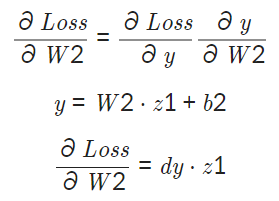

In [24]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.02832116, -0.07985156,  0.04803317,  0.05669366, -0.00315496,
        -0.05359308,  0.06635977,  0.0304088 ,  0.05128602, -0.08786065],
       [ 0.02171426, -0.04768074,  0.03689223,  0.04631407, -0.0738185 ,
        -0.05461242,  0.05285185,  0.02517264,  0.04178263, -0.04861602],
       [-0.0210043 , -0.07246576,  0.05906537,  0.07030189, -0.06271996,
        -0.01365424,  0.07977329,  0.0386683 ,  0.0633803 , -0.14134489],
       [-0.0321866 , -0.07223527,  0.04985839,  0.05875687, -0.01222916,
        -0.04054532,  0.06818471,  0.03171446,  0.05306721, -0.10438528],
       [-0.01035647, -0.05569987,  0.03778277,  0.04814419, -0.07855463,
        -0.03197229,  0.05409126,  0.02594744,  0.04283769, -0.0322201 ],
       [-0.0437896 , -0.02429313,  0.0499905 ,  0.0628676 , -0.05777379,
        -0.08411666,  0.07206848,  0.03302083,  0.05584023, -0.06381446],
       [ 0.00770802, -0.07771534,  0.03260001,  0.03850294, -0.01354875,
        -0.03713243,  0.045178  ,  0.02098706

In [25]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [26]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [27]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [28]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

In [29]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [30]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.10886518 0.12760173 0.09006709 0.08616445 0.07292186 0.10979686
  0.15062968 0.06791895 0.0793936  0.1066406 ]
 [0.14840535 0.14466687 0.08551577 0.08949962 0.06644841 0.08836424
  0.14977485 0.06433282 0.07820798 0.08478409]
 [0.14138657 0.12997293 0.08679333 0.08440659 0.08166807 0.10016431
  0.11749578 0.06646057 0.07723673 0.11441513]
 [0.13273088 0.12229644 0.08034268 0.07541841 0.07604125 0.08473538
  0.1269791  0.07773166 0.09959254 0.12413167]
 [0.12810818 0.15070325 0.08445311 0.08227391 0.07175623 0.08246164
  0.15725386 0.04856487 0.10199618 0.09242877]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.2209295440312666


In [31]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [32]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.08273658 0.08637643 0.09765125 0.07711743 0.0759769  0.18179191
  0.10206936 0.08569364 0.08880575 0.12178077]
 [0.089787   0.09789977 0.08479097 0.08337294 0.09200539 0.18157819
  0.10117202 0.07535032 0.08678008 0.10726334]
 [0.11172797 0.09505055 0.10738343 0.05348479 0.10217917 0.17186815
  0.09551334 0.08161176 0.09701954 0.08416129]
 [0.090957   0.08488936 0.10471017 0.06772107 0.09864443 0.22616129
  0.09776325 0.07129167 0.07049491 0.08736684]
 [0.09848258 0.09489832 0.09652623 0.05869017 0.10481111 0.19350924
  0.08594165 0.08441886 0.08435623 0.0983656 ]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.236341154835769
---------
[[0.09742532 0.09855563 0.08274083 0.06743101 0.08655017 0.19027592
  0.08715238 0.07471781 0.07619307 0.13895787]
 [0.10946983 0.11131847 0.07127325 0.07241964 0.10434147 0.18373644
  0.08563703 0.06542051 0.0739

In [33]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [34]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13938433, 0.13273512, 0.04698239, 0.04077706, 0.11228306,
       0.20841284, 0.05030711, 0.04488913, 0.0439673 , 0.18026166])

In [35]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [36]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13938433 0.13273512 0.04698239 0.04077706 0.11228306 0.20841284
 0.05030711 0.04488913 0.0439673  0.18026166]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.1


In [37]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [38]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3026690740387052
train acc, test acc | 0.09915, 0.1009
Loss:  0.861103238082166
train acc, test acc | 0.7929, 0.7969
Loss:  0.4169444769288732
train acc, test acc | 0.8788833333333333, 0.8822
Loss:  0.30643216382396793
train acc, test acc | 0.8982, 0.8994
Loss:  0.26095064286557534
train acc, test acc | 0.9066166666666666, 0.9111
Loss:  0.3622319535761915
train acc, test acc | 0.9147833333333333, 0.9177
Loss:  0.21625815276288887
train acc, test acc | 0.9194833333333333, 0.9224
Loss:  0.32835716971699236
train acc, test acc | 0.9235333333333333, 0.9244
Loss:  0.311234519710758
train acc, test acc | 0.9271, 0.9298
Loss:  0.25812828525322545
train acc, test acc | 0.9311666666666667, 0.9326
Loss:  0.1544174655871142
train acc, test acc | 0.93325, 0.9346
Loss:  0.27249125718028766
train acc, test acc | 0.9367166666666666, 0.9368
Loss:  0.17508270205924975
train acc, test acc | 0.9387833333333333, 0.9395
Loss:  0.1442723146906571
train acc, test acc |

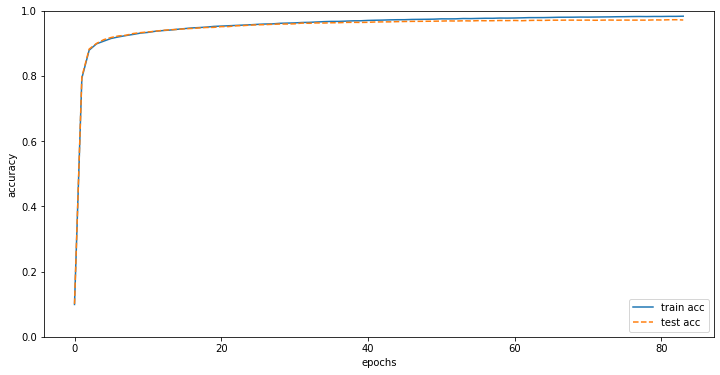

In [39]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

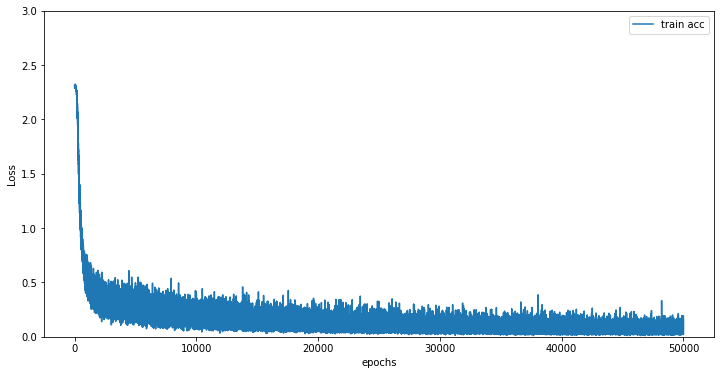

In [40]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()